<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng01/A01_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Ipython script should be in the folder.


Made by Boris Oskolkov for Assignment01 (CS5783)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import string
import pandas as pd
from IPython.display import Image

 --------- start of a first problem --------------

Let's plot training data to choose the basis of our model.

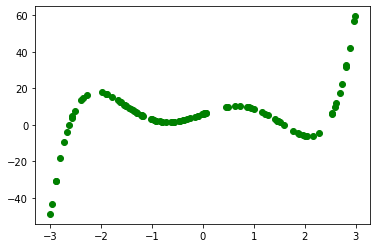

In [2]:
#plot training data
x_data=np.load('x_train.npy')
y_data=np.load('y_train.npy')
plt.plot(x_data, y_data, 'go')
plt.show()

We clearly see that it involves cubic polynomial basis. But, Somethig in the middle looks suspiciously different. Let's take a look to a another piece of data.

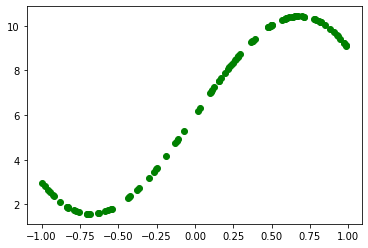

In [3]:
#plotting test data
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')
plt.plot(x_test, y_test, 'go')
plt.show()

It looks like our data includes Fourier Basis. 
Thus, I will make several attempts to found valid basis for our future model.

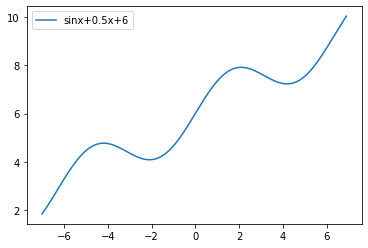

In [4]:
x = np.arange(-7, 7, 0.1)
y1 = np.sin(x)+0.5*(x)+6
y2 = (x)**3+1.5*x**2+6
y3 = np.cos(x)*2+(x)**3+1.5*x+6
y4 = np.cos(x)*2*(x)**3+1.5*x*np.sin(x)+6

plt.plot(x, y1, label="sinx+0.5x+6")
plt.legend()
plt.show()


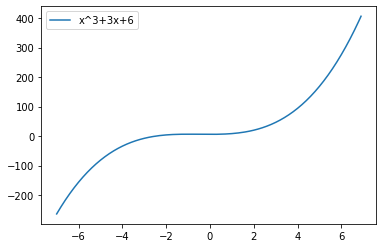

In [5]:
plt.plot(x, y2, label="x^3+3x+6")
plt.legend()
plt.show()

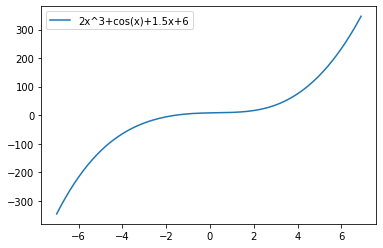

In [6]:
plt.plot(x, y3, label="2x^3+cos(x)+1.5x+6")
plt.legend()
plt.show()

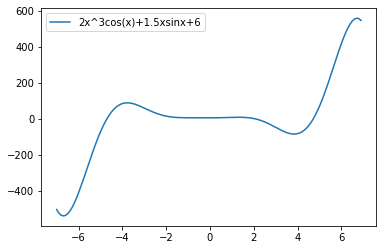

In [7]:
plt.plot(x, y4, label="2x^3cos(x)+1.5xsinx+6")
plt.legend()
plt.show()

The last one looks familiar, so let's use composition of polynomial and Fourier basises for our model.

Answering to the second question, relationship between one variable and output is non-linear. We need to add some non-linearity to the model. I believe that we should use polynomial and Fourier basis functions for training.

I see a right basis as following:


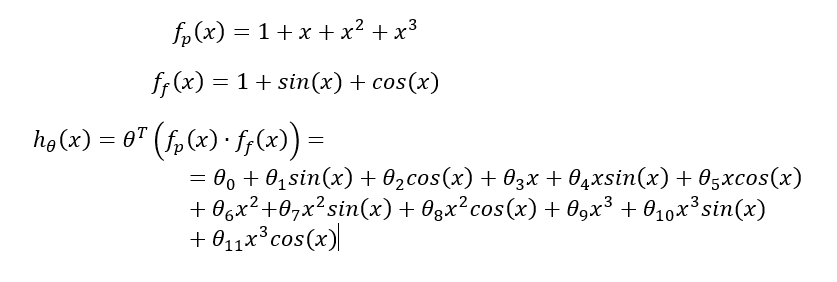

In [8]:
def apply_basis(x):
  basis_composition=[np.ones((x.shape[0], 1)), 
                    np.sin(x),
                    np.cos(x),
                    x,
                    x*np.sin(x),
                    x*np.cos(x),
                    x**2,
                    (x**2)*np.sin(x),
                    (x**2)*np.cos(x),
                    x**3,
                    (x**3)*np.sin(x),
                    (x**3)*np.cos(x),]
  return np.hstack(basis_composition)
basis = apply_basis(x_data)
# creating weight function
theta = np.random.randn(len(basis[1]))

Our weight function and basis function is done. Let's apply gradient descent to our model to minimize error or cost function.
I will track the cost function to find out how many iterations would be effective.

In [9]:
def gradient_descent(basis,y,theta,lr,it):
  cost=np.zeros(it)
  m=len(basis[1])
  for i in range(it):
    prediction=np.sum(basis * theta.T , axis=1)
    cost[i] = np.sum((y - prediction)**2)/2
    deriv = lr*(basis.T.dot(y - prediction))/m
    theta=theta+deriv
  plt.plot(cost, label="cost")
  plt.legend()
  plt.show()
  return theta, cost[i]



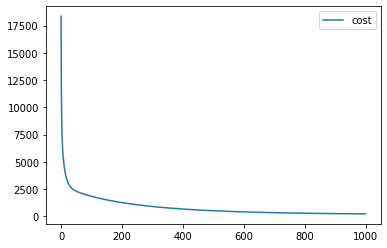

In [10]:
iterations = 1000
lr=0.001
theta,_ = gradient_descent(basis,y_data,theta,lr,iterations)

On the plot we see how cost function is descending. It means that we have learned our model for predictions. Let's check it on test set graphically first.

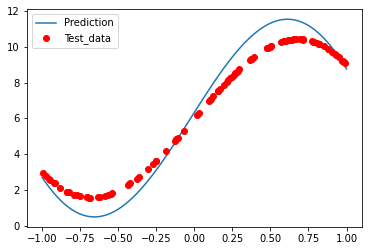

In [11]:
x = np.linspace(-1, 1, num=100)
x=np.r_['0,2,0',x]
basis_x= apply_basis(x)
y_trained = np.sum(basis_x * theta.T , axis=1)
plt.plot(x, y_trained, label="Prediction")
plt.plot(x_test, y_test, 'ro', label = "Test_data")
plt.legend()
plt.show()

The picture above is the best model that I managed to achieve. I have tried different learning rates and number of iterations. So, now we can test our model analytically. For that we calculate an error between model and test data.

In [13]:
# applying our basis on test set
test_basis = apply_basis(x_test)
# computing our prediction
test_prediction = np.sum(test_basis * theta.T , axis=1)
test_cost = np.sum((y_test - test_prediction)**2)/2/len(basis[1])
print (f"the MSE is {test_cost}")

the MSE is 12578.887622357768


The size of error is huge, it could be improved by adjusting the model.However, I believe that I clearly explained my approach for the task.

Equation, which I have got as my final model is following:


y=3.75020107+6.10950276sin(x)+ 2.21252021cos(x)+1.13599346x -0.05898426xsin(x)+ 6.42828601xcos(x)+ 0.68585336x^2-8.27039656x^2 sin(x)+ 0.27816542x^2 cos(x)+ 1.23928794x^3+ 0.14475993x^3 sin(x)-1.54039724x^3 cos(x)

--------- end of a first problem --------------

--------- start of a second problem --------------

Let's load our data into variable using pandas.

In [14]:
h_data = pd.read_csv('Assignment1_Q2_Data.csv')


We have to prepare data by parsing independent variables and dependent, hx_data and hy_data correspondignly 

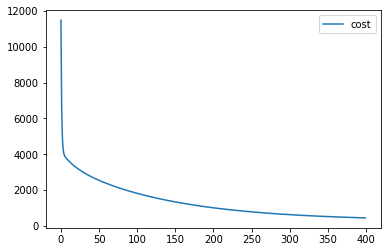

the MSE is 452.9914801524884


In [36]:
hx_data = h_data.drop(['Price (1000$)'], axis=1).to_numpy()
hy_data = h_data[['Price (1000$)']].copy().to_numpy()
#prepare hy_data for our function
hy_data = np.squeeze(hy_data)
# set theta function
theta = np.random.randn(len(hx_data[1]))
#let apply same approach as we did in the 1st task
iterations = 400
lr=0.0001
theta,cost = gradient_descent(hx_data,hy_data,theta,lr,iterations)
print((f"the MSE is {cost}"))

1. What is the average least squares error for the given data using your simple linear regression 
model? 

Average least squares error varies in range 300-750
2.  Which factor has the most effect on the final value? How do you know this? Can you use only 
this feature to predict the price? 


Here the resulting approximate factors for every feauture:									
ID 0.076, Local Price 2.433, Bathrooms 0.320, Land Area 1.40 , Living area 0.12, # Garages 1.033, # Rooms 0.077, # Bedrooms 1.90, Age of home 0.058, Construction type 0.005, Architecture type -0.872, # Fire places 0.546.


Factors with most effect have the biggest theta or weight
The most signficant factor is "Local Price". But, if leave only this factor, we cannot accurately estimate the price, since we have another factors with big weight, such as "# Bedrooms" and "Land Area"
3.  Which factor has the least effect on the final value? How do you know this? What effect does 
removing this feature have on the performance? 


Factors with least effect have the smallest theta. So, such factor is "Construction type". Which surprisingly, since it is obvious that house ID do have any relation to the price, even though it has small weight too.
If we remove this features, in the future it will reduce time amount for learning our model. But, sadly, I cannot say will it be significant.

--------- end of a second problem --------------